In [45]:
from PIL import Image
import numpy as np
import sys
import matplotlib.pyplot as plt

[17:13:14] DEBUG    CACHEDIR=/Users/mark/.matplotlib                                                ]8;id=126390;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/__init__.py\__init__.py]8;;\:]8;id=826165;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/__init__.py#277\277]8;;\

           DEBUG    Using fontManager instance from /Users/mark/.matplotlib/fontlist-v330.json ]8;id=371605;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=364141;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1439\1439]8;;\

In [6]:
SAVE_FOLDER = '.'
PATH_TO_DATA = '../data/'

In [7]:
sys.path.append('../src/')
sys.path.append('../src/lib/data_loaders/')

In [8]:
from Sat2RadModule import Sat2RadDataModule
from DatasetDistributor import DatasetDistributor

In [9]:
module = Sat2RadDataModule(data_dir=PATH_TO_DATA, batch_size=1, splits={"train": 0.6, "val": 0.2, "test": 0.2})
module.setup(None)

        Partitioned Files         
┏━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┓
┃ split      ┃ satellite ┃ radar ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━┩
│ training   │        55 │   165 │
│ validation │        18 │    55 │
│ testing    │        18 │    55 │
└────────────┴───────────┴───────┘

In [10]:
train = module.train_dataloader()

In [20]:
gt = [data[1].detach().numpy() for data in iter(train)]

In [26]:
gt = np.array(gt)

In [27]:
gt.shape

(9, 12, 166, 134)

In [28]:
gt = gt.reshape(-1, 166, 134)

In [29]:
def make_gif(array: np.ndarray, pred=True):
    # imgs = np.random.randint(0, 255, (100, 50, 50, 3), dtype=np.uint8)
    array = array * 255
    imgs = [Image.fromarray(img) for img in array]
    # duration is the number of milliseconds between frames; this is 40 frames per second
    file_name = "pred" if pred else "gt"
    imgs[0].save(
        f"{SAVE_FOLDER}{file_name}_vid.gif",
        save_all=True,
        append_images=imgs[1:],
        duration=50,
        loop=0,
    )

In [30]:
make_gif(gt)

In [31]:
gtSat = [data[0].detach().numpy() for data in iter(train)]

In [33]:
gtSat = np.array(gtSat)

In [34]:
gtSat.shape

(9, 1, 5, 11, 166, 134)

In [36]:
gtSat = gtSat.reshape(-1, 11, 166, 134)

In [41]:
gtSat.shape

(45, 11, 166, 134)

In [42]:
imfs = gtSat[0]

In [43]:
make_gif(imfs)

[17:13:19] DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.         ]8;id=162167;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=428236;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/pyplot.py#295\295]8;;\

           DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.         ]8;id=15091;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=684213;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/pyplot.py#295\295]8;;\

           DEBUG    findfont: Matching                                                         ]8;id=92739;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=245954;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1329\1329]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=722438;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=46617;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf',                              
                    name='STIXNonUnicode', style='italic', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=823504;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=81797;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf',                            
                    name='DejaVu Serif Display', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=544733;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=912135;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=882445;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=411609;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf',                        
                    name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=672308;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=758066;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=309358;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=758884;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10',                           
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=813479;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=955490;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf',                            
                    name='DejaVu Serif', style='italic', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=291077;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=794373;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf',                               
                    name='DejaVu Sans', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=917010;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=90131;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu                       
                    Sans', style='normal', variant='normal', weight=400, stretch='normal',                         
                    size='scalable')) = 0.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=653511;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=461742;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf',                              
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=729596;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=513578;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf',                                    
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=710200;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=426349;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=699353;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=663389;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf',                                
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=386369;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=276244;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf',                           
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=232858;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=491326;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf',                                   
                    name='STIXGeneral', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=41368;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=819494;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                            
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=75118;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=633449;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf',                        
                    name='DejaVu Sans', style='oblique', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 1.335                                                    

           DEBUG    findfont:                                                                  ]8;id=208721;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133037;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                             
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=106184;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=542569;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10',                           
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=189654;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=832429;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf',                             
                    name='DejaVu Sans Display', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=859504;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=128608;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf',                              
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=269900;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=192412;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf',                              
                    name='DejaVu Serif', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=586378;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=908937;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                            
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=895207;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=288948;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=359418;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=820940;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                             
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=491784;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=789575;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf',                             
                    name='STIXGeneral', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=793085;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=154037;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf',                              
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=3151;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=717931;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf',                        
                    name='DejaVu Serif', style='italic', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=249798;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=175740;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                             
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=305623;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=192952;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf',                            
                    name='DejaVu Sans', style='oblique', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 1.05                                                     

           DEBUG    findfont:                                                                  ]8;id=139974;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851833;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf',                                 
                    name='STIXNonUnicode', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=355250;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=152922;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf',                              
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=864429;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=364131;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf'                     
                    , name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=663744;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=4280;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf',                                 
                    name='STIXNonUnicode', style='italic', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=716052;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=853197;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf',                                
                    name='STIXGeneral', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=358405;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=924878;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=203747;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=474381;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu                      
                    Serif', style='normal', variant='normal', weight=400, stretch='normal',                        
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=68186;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=235782;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf',                             
                    name='STIXGeneral', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=853558;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=945404;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Reg                     
                    ular.ttf', name='Noto Sans Cham', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=809405;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=201895;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=339841;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=467139;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperial                     
                    Aramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal',                       
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=593556;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=381712;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh                     
                    -Regular.ttf', name='Noto Sans Tifinagh', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=391366;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=714354;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.ot                     
                    f', name='STIXNonUnicode', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=5171;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=72239;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymRe                     
                    g.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=364067;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995286;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMro-Regu                     
                    lar.ttf', name='Noto Sans Mro', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=243757;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=48969;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc',                         
                    name='Songti SC', style='normal', variant='normal', weight=900,                                
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=996985;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=64792;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf',                        
                    name='Mishafi', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=166273;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=180937;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPalmyren                     
                    e-Regular.ttf', name='Noto Sans Palmyrene', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=447672;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=433389;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W7.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=319237;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=974832;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSomp                     
                    eng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=441303;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=993937;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeroitic                     
                    -Regular.ttf', name='Noto Sans Meroitic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=704354;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=188432;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf',                           
                    name='Skia', style='normal', variant='normal', weight=5, stretch='normal',                     
                    size='scalable')) = 10.42525                                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=305621;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=613093;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=383269;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=341461;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold                         
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 4.971363636363637                                        

           DEBUG    findfont:                                                                  ]8;id=800481;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=767094;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc'                     
                    , name='Baskerville', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=273497;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=629596;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMiao-Reg                     
                    ular.ttf', name='Noto Sans Miao', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=13136;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=155491;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc',                      
                    name='Phosphate', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=980543;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=691011;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMarchen-                     
                    Regular.ttf', name='Noto Sans Marchen', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=348204;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851623;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGunjalaG                     
                    ondi-Regular.otf', name='Noto Sans Gunjala Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=657920;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=94656;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.o                     
                    tf', name='STIXGeneral', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=693203;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=318121;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 7.413636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=652794;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=698815;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Arial', style='italic', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 7.698636363636363                            

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=614311;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=887929;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 8 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=690532;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=833151;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=114893;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=56175;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=346978;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=930847;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItali                     
                    c-Regular.ttf', name='Noto Sans Old Italic', style='italic',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=588414;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=887620;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf',                     
                    name='STIXVariants', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=347179;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=149412;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regul                     
                    ar.ttf', name='Noto Sans Yi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=569942;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=372642;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf',                          
                    name='Silom', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=11719;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=943182;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W9.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont:                                                                  ]8;id=437930;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=690112;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=673624;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=569278;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc                     
                    ', name='Devanagari MT', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=741693;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845160;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf',                       
                    name='Gurmukhi MT', style='normal', variant='normal', weight=500,                              
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=917027;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=436493;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=266693;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=914373;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.t                     
                    tc', name='KufiStandardGK', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf',       ]8;id=447616;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=320187;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=894877;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=942704;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSharada-                     
                    Regular.ttf', name='Noto Sans Sharada', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=679845;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=206493;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPermi                     
                    c-Regular.ttf', name='Noto Sans Old Permic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc',      ]8;id=714866;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=978056;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Thonburi', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=970926;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=584124;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc',                     
                    name='Myanmar MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=435088;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=773192;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=283550;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=785602;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMultani-                     
                    Regular.ttf', name='Noto Sans Multani', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=420141;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=95857;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=391169;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=25481;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurasht                     
                    ra-Regular.ttf', name='Noto Sans Saurashtra', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=818985;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=8284;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc',                            
                    name='Noto Serif Myanmar', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=216944;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=281453;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=980037;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=203749;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PartyLET-plain.t                     
                    tf', name='Party LET', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=677934;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=198019;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf',                         
                    name='Impact', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=482521;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=852346;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc',                        
                    name='Papyrus', style='normal', variant='normal', weight=400,                                  
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont:                                                                  ]8;id=754253;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=348010;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf'                     
                    , name='Trattatello', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf',  ]8;id=230187;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=145182;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Zapf Dingbats', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Monaco.ttf',        ]8;id=974410;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=227136;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Monaco', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf',   ]8;id=937907;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=437802;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Rounded', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=205905;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=151818;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-R                     
                    egular.ttf', name='Noto Sans Thaana', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=960165;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=108403;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=804264;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=419051;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf',                      
                    name='Wingdings', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=518086;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142602;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc',                        
                    name='Raanana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=326371;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=754524;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W5.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=500, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=813009;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=884785;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc',                         
                    name='Marion', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=113086;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=190222;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc',                            
                    name='Noto Sans Armenian', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=71501;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=489418;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPahawhHm                     
                    ong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=776631;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=943796;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPauCinHa                     
                    u-Regular.ttf', name='Noto Sans Pau Cin Hau', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=265929;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83682;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc',                             
                    name='Noto Sans Kannada', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=702372;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=384790;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.tt                     
                    c', name='DecoType Naskh', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=730717;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=900395;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=300549;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=53646;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc                     
                    ', name='Sukhumvit Set', style='normal', variant='normal', weight=250,                         
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=741169;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=164428;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc',                        
                    name='Al Bayan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=491239;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=939898;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAdlam-Re                     
                    gular.ttf', name='Noto Sans Adlam', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush  ]8;id=519326;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=821443;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Script.ttf', name='Brush Script MT', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=618451;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586107;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=521474;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=377404;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi                              
                    Gold.ttf', name='Mishafi Gold', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=344775;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=40749;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWarangCi                     
                    ti-Regular.ttf', name='Noto Sans Warang Citi', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=659616;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=827834;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Re                     
                    gular.ttf', name='Noto Sans Buhid', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc',  ]8;id=18354;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=835329;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf',          ]8;id=361750;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=547905;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=869846;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=678933;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier                              
                    New.ttf', name='Courier New', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=714902;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=685917;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc',                     
                    name='Chalkboard', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=996693;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=826191;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldNorth                     
                    Arabian-Regular.ttf', name='Noto Sans Old North Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=57590;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=206293;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam                     
                    MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=204396;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7499;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLu                     
                    e-Regular.ttf', name='Noto Sans New Tai Lue', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc',      ]8;id=524026;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701945;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Aqua Kana', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=270768;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=781758;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic                     
                    -Regular.ttf', name='Noto Sans Ugaritic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=522121;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=634869;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc',                        
                    name='Charter', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=955238;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=115372;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Alternate Bold.ttf', name='DIN Alternate', style='normal',                                     
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont:                                                                  ]8;id=952497;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=485886;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc',                       
                    name='Damascus', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=680758;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=621870;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.ot                     
                    f', name='STIXNonUnicode', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=82626;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=105362;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc                     
                    ', name='New Peninim MT', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=875729;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=298070;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-R                     
                    egular.ttf', name='Noto Sans Carian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=421402;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=380024;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet                            
                    MS.ttf', name='Trebuchet MS', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=93869;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=53989;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Re                     
                    gular.ttf', name='Noto Sans Limbu', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=597349;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701867;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.tt                     
                    c', name='ITF Devanagari', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf',    ]8;id=700272;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=433433;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=377739;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=915085;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-R                     
                    egular.ttf', name='Noto Sans Lycian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=4406;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=557463;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-                     
                    Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=465339;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=211023;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold Italic.ttf', name='Times New Roman', style='italic',                            
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=983824;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=627665;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc'                     
                    , name='Euphemia UCAS', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=294624;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=520303;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam                       
                    MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=235029;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=489744;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman.ttf', name='Times New Roman', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc',      ]8;id=654686;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=948554;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geeza Pro', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=41050;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=858497;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMendeKik                     
                    akui-Regular.ttf', name='Noto Sans Mende Kikakui', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=286404;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=302140;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc',                             
                    name='Noto Sans Myanmar', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=895624;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=918401;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian',                           
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=443851;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=316987;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf',      ]8;id=654085;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=337671;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Keyboard', style='normal', variant='normal', weight=100,                                
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=820738;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=299635;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymB                     
                    ol.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=396312;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=734874;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-R                     
                    egular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc',    ]8;id=216242;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508441;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Mukta Mahee', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=674832;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=21145;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-R                     
                    egular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=466083;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=814544;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc',                          
                    name='Farah', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc',         ]8;id=127495;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=490364;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Times', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=629572;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=414776;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPsalterP                     
                    ahlavi-Regular.ttf', name='Noto Sans Psalter Pahlavi', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=486888;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836091;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc',                          
                    name='Didot', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=744558;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=874172;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf',                         
                    name='Tahoma', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=377334;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=144584;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

[17:13:20] DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompact.ttf',     ]8;id=256541;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=699211;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Compact', style='normal', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 10.62                                                    

           DEBUG    findfont:                                                                  ]8;id=293257;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=227965;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTakri-Re                     
                    gular.ttf', name='Noto Sans Takri', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf',      ]8;id=59497;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=753384;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Mono', style='normal', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 10.14975                                                 

           DEBUG    findfont:                                                                  ]8;id=510435;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=62587;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhudawad                     
                    i-Regular.ttf', name='Noto Sans Khudawadi', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=82653;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=917286;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W6.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=600, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont:                                                                  ]8;id=759095;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=119659;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Bold.ttf', name='Courier New', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=563502;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=436517;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf',                        
                    name='Verdana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 3.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=395420;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=59493;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-                     
                    Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=274590;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83498;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneifor                     
                    m-Regular.ttf', name='Noto Sans Cuneiform', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale ]8;id=998760;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=56943;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Mono.ttf', name='Andale Mono', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=784295;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=450170;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf',                     
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=341315;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=980192;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc                     
                    ', name='InaiMathi', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma ]8;id=855536;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=848918;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=648474;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=471700;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCaucasia                     
                    nAlbanian-Regular.ttf', name='Noto Sans Caucasian Albanian',                                   
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=649654;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=493848;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Re                     
                    gular.ttf', name='Noto Sans Batak', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=592885;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=573009;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-                     
                    Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=746108;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=607998;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc',                         
                    name='Cochin', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=758047;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=855072;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharosht                     
                    hi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=987736;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=902830;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=612219;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=689052;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc',                     
                    name='Kannada MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=688091;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=895935;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymRe                     
                    g.otf', name='STIXSizeFiveSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=417628;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=63248;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc',                              
                    name='Kohinoor Telugu', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc',     ]8;id=425021;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=828259;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 7.322727272727273                                        

           DEBUG    findfont:                                                                  ]8;id=758138;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=320330;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHatran-R                     
                    egular.ttf', name='Noto Sans Hatran', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=62100;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=385973;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal',                     
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=226788;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=827978;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc',                       
                    name='Gill Sans', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=856231;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=846835;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-                     
                    Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=772509;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=800446;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam                      
                    MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=301884;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=119532;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc',                       
                    name='Mshtakan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=417155;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=699486;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=729997;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=894966;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc'                     
                    , name='SignPainter', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=565120;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=874028;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldHunga                     
                    rian-Regular.ttf', name='Noto Sans Old Hungarian', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=941352;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=267053;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc',                         
                    name='PT Sans', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=665702;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=947461;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc',                              
                    name='Kohinoor Bangla', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=662835;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=171775;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-                     
                    Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=316371;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=767115;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-                     
                    Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next         ]8;id=462515;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=538732;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed.ttc', name='Avenir Next Condensed', style='normal',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=762931;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445533;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W0.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=100, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=256251;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=599514;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf'                     
                    , name='Chalkduster', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=961352;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=49252;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold                         
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=81808;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=474738;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese                     
                    -Regular.ttf', name='Noto Sans Buginese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=446346;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=421911;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMahajani                     
                    -Regular.ttf', name='Noto Sans Mahajani', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=424033;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=924251;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc',                            
                    name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=898180;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586781;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBassaVah                     
                    -Regular.ttf', name='Noto Sans Bassa Vah', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=905369;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=161483;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=707409;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518066;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIt                     
                    a.otf', name='STIXGeneral', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=384858;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=132647;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWancho-R                     
                    egular.ttf', name='Noto Sans Wancho', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc',   ]8;id=410427;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=897937;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir Next', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=995524;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=987295;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=740675;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=84399;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalines                     
                    e-Regular.ttf', name='Noto Serif Balinese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=912937;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=117126;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=422980;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=751369;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc',                        
                    name='Kailasa', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=326725;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=261160;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc'                     
                    , name='Copperplate', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=102755;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=202521;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-                     
                    Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans       ]8;id=694736;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=892288;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal',                            
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=535267;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=167246;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNa                     
                    gri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=415398;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716343;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=134920;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246225;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc',                        
                    name='Baghdad', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=575367;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503246;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersi                     
                    an-Regular.ttf', name='Noto Sans Old Persian', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=505563;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142271;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc',                           
                    name='Kefa', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=378305;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=343462;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=417654;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=878971;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf',                       
                    name='Ayuthaya', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=839434;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=571867;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 4.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=179997;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=248565;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc',                         
                    name='Futura', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=970807;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=880070;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=12689;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246023;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf                     
                    ', name='AppleMyungjo', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=540903;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=903442;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 3.9713636363636367                                       

           DEBUG    findfont:                                                                  ]8;id=804509;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=158893;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Academy Engraved                     
                    LET Fonts.ttf', name='Academy Engraved LET', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=193146;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=982923;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc                     
                    ', name='Chalkboard SE', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=258557;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836878;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolia                     
                    n-Regular.ttf', name='Noto Sans Mongolian', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=793177;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756828;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamarita                     
                    n-Regular.ttf', name='Noto Sans Samaritan', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Courier.ttc',       ]8;id=487;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=153260;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Courier', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=834483;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=440724;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=560550;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142292;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansElbasan-                     
                    Regular.ttf', name='Noto Sans Elbasan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc',      ]8;id=252330;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=239663;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Kohinoor Devanagari', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye ]8;id=231518;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=498409;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', ]8;id=42278;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=122869;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Heiti TC', style='normal', variant='normal', weight=300,                                 
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=319537;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=76974;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam                            
                    MN.ttc', name='Malayalam MN', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=607363;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=665667;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFArabic.ttf',      ]8;id=693619;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112659;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Arabic', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=355272;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=618407;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc',                         
                    name='Galvji', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=841465;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=581465;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc',                           
                    name='Sana', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=445153;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=438485;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf',                        
                    name='Georgia', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=582031;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=868473;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam                       
                    MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=391963;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=404210;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf',                      
                    name='Krungthep', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=341559;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=750876;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=366292;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=722206;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf',                       
                    name='Webdings', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=410972;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=644251;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 6 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan  ]8;id=268042;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=236288;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc',    ]8;id=441644;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=80079;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noteworthy', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=277716;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=393682;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=488717;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=835096;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf'                     
                    , name='AppleGothic', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=845692;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=173409;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc',                     
                    name='Sinhala MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=941826;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=963306;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc',                            
                    name='Kohinoor Gujarati', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=975065;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=374794;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text                         
                    Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=946767;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=777046;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=88024;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445026;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal',                     
                    weight=400, stretch='condensed', size='scalable')) = 11.25                                     

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=520320;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=81993;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Black.ttf', name='Arial Black', style='normal', variant='normal',                              
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', ]8;id=164876;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=497127;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Sans Oriya', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=890184;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=317401;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNabataea                     
                    n-Regular.ttf', name='Noto Sans Nabataean', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=357821;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=392506;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Arial', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 6.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc',      ]8;id=502343;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845559;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Palatino', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=640139;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=490528;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBhaiksuk                     
                    i-Regular.ttf', name='Noto Sans Bhaiksuki', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=98319;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=109438;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W3.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=184651;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=429311;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansDuployan                     
                    -Regular.ttf', name='Noto Sans Duployan', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc',    ]8;id=913937;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=406894;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Marker Felt', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=452258;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=268799;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetChero                     
                    kee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', ]8;id=297101;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=894524;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Braille', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=582497;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=365839;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-                     
                    Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=444605;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=919065;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta                     
                    .otf', name='STIXNonUnicode', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc',        ]8;id=266073;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=333847;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=586917;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445591;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Reg                     
                    ular.ttf', name='Noto Sans Lisu', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=463182;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=711004;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf',                        
                    name='STIXVariants', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=203537;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=261767;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W2.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=250, stretch='normal', size='scalable')) = 10.1925                                      

           DEBUG    findfont:                                                                  ]8;id=544172;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=485294;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=697745;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=281321;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold                     
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=883645;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=515807;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow.ttf', name='Arial Narrow', style='normal', variant='normal',                            
                    weight=400, stretch='condensed', size='scalable')) = 10.25                                     

           DEBUG    findfont:                                                                  ]8;id=147708;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=703638;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMasaramG                     
                    ondi-Regular.otf', name='Noto Sans Masaram Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=122607;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=220544;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=600575;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=773206;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifAhom-Re                     
                    gular.ttf', name='Noto Serif Ahom', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=268489;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=24711;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptian                     
                    Hieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=481437;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=247343;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc',                       
                    name='Rockwell', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=183623;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=558128;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifYezidi-                     
                    Regular.otf', name='Noto Serif Yezidi', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=336424;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=707494;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.t                     
                    tc', name='Snell Roundhand', style='normal', variant='normal', weight=500,                     
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=549358;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=430888;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc',                         
                    name='Waseem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=584183;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=812096;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanes                     
                    e-Regular.ttf', name='Noto Sans Sundanese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=212304;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=281458;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.t                     
                    tc', name='PT Serif Caption', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=416151;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=181481;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-                     
                    Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=451478;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=682809;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc',                        
                    name='PT Serif', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=208709;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=341958;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=695124;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=279166;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-                     
                    Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=695026;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=830799;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewrit                     
                    er.ttc', name='American Typewriter', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=136451;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121518;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc',                           
                    name='Muna', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=499276;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=438137;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf',                          
                    name='Arial', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 6.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=963429;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=124487;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolit                     
                    ic-Regular.ttf', name='Noto Sans Glagolitic', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=829234;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=289596;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W8.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=800, stretch='normal', size='scalable')) = 10.43                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple  ]8;id=89442;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=767177;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Chancery.ttf', name='Apple Chancery', style='normal', variant='normal',                        
                    weight=0, stretch='normal', size='scalable')) = 10.43                                          

           DEBUG    findfont:                                                                  ]8;id=882342;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97355;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa                     
                    -Regular.ttf', name='Noto Sans Tagbanwa', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=587120;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=926983;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf',                     
                    name='Herculanum', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', ]8;id=532076;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=265172;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica Neue', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=482112;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=9337;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand                         
                    Bold.ttf', name='Bradley Hand', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=135412;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=18548;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=473955;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=15005;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewa-Reg                     
                    ular.ttf', name='Noto Sans Newa', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=512225;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=792907;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=994554;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=295415;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-                     
                    Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=149132;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=773057;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc',                         
                    name='Nadeem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=965352;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83998;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItali                     
                    c.otf', name='STIXGeneral', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=507655;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=711020;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc',                       
                    name='Shree Devanagari 714', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=568370;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=729472;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc',                        
                    name='Athelas', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf',        ]8;id=831542;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720235;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Symbol', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=198871;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=925484;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal',                       
                    weight=700, stretch='condensed', size='scalable')) = 10.535                                    

           DEBUG    findfont:                                                                  ]8;id=15406;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801363;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenici                     
                    an-Regular.ttf', name='Noto Sans Phoenician', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=74809;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=226047;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari                           
                    Sangam MN.ttc', name='Devanagari Sangam MN', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=474097;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=840652;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBo                     
                    l.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=994969;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=740804;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-R                     
                    egular.ttf', name='Noto Sans Syriac', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=996742;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185544;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=852291;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=30873;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc',                         
                    name='Beirut', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=327423;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=915133;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactItalic.ttf',                             
                    name='.SF Compact', style='italic', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 11.62                                                    

           DEBUG    findfont:                                                                  ]8;id=58080;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=700855;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler                              
                    Text.ttc', name='Hoefler Text', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=153127;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=947554;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regu                     
                    lar.ttf', name='Noto Sans NKo', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=95994;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=297165;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc',                     
                    name='Gujarati MT', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=562422;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=259166;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese                     
                    -Regular.otf', name='Noto Sans Javanese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=241641;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=25357;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMa                     
                    yek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=55468;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=890810;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-R                     
                    egular.ttf', name='Noto Sans Gothic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=277199;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=750173;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=650525;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=335260;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc',                         
                    name='PT Mono', style='normal', variant='normal', weight=700,                                  
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=640976;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=248805;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=585393;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=564061;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-                     
                    Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=820656;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=25904;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=485291;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=822278;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-                     
                    Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=56251;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=522409;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsage-Re                     
                    gular.ttf', name='Noto Sans Osage', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=400886;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=409547;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                       
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=57385;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=494407;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=763028;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701209;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurki                     
                    c-Regular.ttf', name='Noto Sans Old Turkic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=140698;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=444977;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Re                     
                    gular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=641468;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=723449;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold.ttf', name='Trebuchet MS', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=175767;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=390288;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanifiRo                     
                    hingya-Regular.ttf', name='Noto Sans Hanifi Rohingya', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=74655;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=484886;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal',                            
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN   ]8;id=739332;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=957093;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Maru Gothic Pro', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=546086;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928071;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-R                     
                    egular.ttf', name='Noto Sans Rejang', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=615336;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=533880;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf',                      
                    name='Big Caslon', style='normal', variant='normal', weight=500,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=598228;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=183040;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regu                     
                    lar.ttf', name='Noto Sans Vai', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=423251;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=877724;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf',                       
                    name='Luminari', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=222200;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=12824;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-R                     
                    egular.ttf', name='Noto Sans Chakma', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=416342;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=98640;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf',                              
                    name='.SF NS Mono', style='italic', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 11.14975                                                 

           DEBUG    findfont:                                                                  ]8;id=61167;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=24275;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc',                        
                    name='Seravek', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc',         ]8;id=916502;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=396898;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Menlo', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=130340;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=552687;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansModi-Reg                     
                    ular.ttf', name='Noto Sans Modi', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=405238;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586617;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=638249;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=727147;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed Bold.ttf', name='DIN Condensed', style='normal',                                     
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=754689;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=124352;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W1.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=114896;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=771831;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=727579;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981493;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf',                        
                    name='Zapfino', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc',  ]8;id=163952;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=585281;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Lucida Grande', style='normal', variant='normal', weight=500,                            
                    stretch='normal', size='scalable')) = 2.872272727272727                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti             ]8;id=677020;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=364232;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium.ttc', name='Heiti TC', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=982281;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=269813;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.t                     
                    tc', name='Superclarendon', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=571979;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=883612;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans                       
                    Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', ]8;id=763082;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=125861;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='italic', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=541794;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=921704;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam                      
                    MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=765098;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=581541;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Re                     
                    gular.ttf', name='Noto Sans Bamum', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=868424;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=621609;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=674280;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=2601;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf',                            
                    name='.SF Compact Rounded', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝        ]8;id=86564;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=428418;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal',                      
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=486405;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790316;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhojki-R                     
                    egular.ttf', name='Noto Sans Khojki', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=742519;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=143074;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf',                         
                    name='Farisi', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=810130;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=632235;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam                       
                    MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=578177;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=467474;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold Italic.ttf', name='Arial Narrow', style='italic',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    11.535                                                                                         

           DEBUG    findfont:                                                                  ]8;id=121770;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=514570;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf'                     
                    , name='STIXGeneral', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=934510;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=189436;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Italic.ttf', name='Times New Roman', style='italic',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=915157;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=885507;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=865533;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508414;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-R                     
                    egular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', ]8;id=801421;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=822454;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Symbols', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=857688;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=771423;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSiddham-                     
                    Regular.ttf', name='Noto Sans Siddham', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=217570;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=759423;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=220556;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=464305;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf',        ]8;id=857735;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=11726;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Unicode MS', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=298416;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505015;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansManichae                     
                    an-Regular.ttf', name='Noto Sans Manichaean', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=141305;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133517;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=445085;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=266185;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-R                     
                    egular.ttf', name='Noto Sans Coptic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=536355;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135923;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearA-                     
                    Regular.ttf', name='Noto Sans Linear A', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Geneva.ttf',        ]8;id=373391;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=630316;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geneva', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 4.595454545454545                                        

           DEBUG    findfont:                                                                  ]8;id=394806;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121571;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc',                        
                    name='Corsiva Hebrew', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=803568;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=636458;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouth                     
                    Arabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc',       ]8;id=689770;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668628;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Hebrew', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=450715;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=292382;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold.ttf', name='Times New Roman', style='normal',                                   
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont:                                                                  ]8;id=566988;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=680976;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf',                        
                    name='Kokonor', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc',      ]8;id=359765;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756061;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='PingFang HK', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc',        ]8;id=475297;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=528340;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Optima', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=720713;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=738488;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=111848;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=860153;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymR                     
                    eg.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=835829;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=449015;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi                             
                    MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=69176;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=245480;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf',                          
                    name='Sathu', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=808201;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=723918;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=80700;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=127613;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-R                     
                    egular.ttf', name='Noto Sans Lydian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: Matching                                                         ]8;id=541230;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=878509;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1367\1367]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0 to DejaVu Sans                                                                            
                    ('/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotl                     
                    ib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.                                 

[17:13:21] DEBUG    findfont: Matching                                                         ]8;id=608870;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=182667;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1329\1329]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=365980;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=406113;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf',                              
                    name='STIXNonUnicode', style='italic', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=14593;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=794011;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf',                            
                    name='DejaVu Serif Display', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=70742;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=921653;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=170165;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=233344;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf',                        
                    name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=966446;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=465418;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=163695;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=625163;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10',                           
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=454737;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=728457;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf',                            
                    name='DejaVu Serif', style='italic', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=828705;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=650547;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf',                               
                    name='DejaVu Sans', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=509350;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=537929;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu                       
                    Sans', style='normal', variant='normal', weight=400, stretch='normal',                         
                    size='scalable')) = 0.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=794882;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=41601;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf',                              
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=496072;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=844041;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf',                                    
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=23236;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=349239;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=793215;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=361178;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf',                                
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=664631;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559183;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf',                           
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=724892;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=79578;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf',                                   
                    name='STIXGeneral', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=4801;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=945006;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                            
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=863660;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=29977;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf',                        
                    name='DejaVu Sans', style='oblique', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 1.335                                                    

           DEBUG    findfont:                                                                  ]8;id=559519;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=859131;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                             
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=474074;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=14567;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10',                           
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=212389;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=67437;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf',                             
                    name='DejaVu Sans Display', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=456523;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=767682;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf',                              
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=674026;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=413364;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf',                              
                    name='DejaVu Serif', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=116627;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=957111;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                            
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=930034;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=902861;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=828070;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=161011;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                             
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=296659;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=571032;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf',                             
                    name='STIXGeneral', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=258307;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=401745;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf',                              
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=305937;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=456986;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf',                        
                    name='DejaVu Serif', style='italic', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=340432;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836737;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                             
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=935730;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=988444;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf',                            
                    name='DejaVu Sans', style='oblique', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 1.05                                                     

           DEBUG    findfont:                                                                  ]8;id=202569;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=248207;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf',                                 
                    name='STIXNonUnicode', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=709104;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=34681;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf',                              
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=769646;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=262886;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf'                     
                    , name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=550098;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=684464;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf',                                 
                    name='STIXNonUnicode', style='italic', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=429535;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=50938;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf',                                
                    name='STIXGeneral', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=593877;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=299309;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10',                         
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=706814;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=277125;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu                      
                    Serif', style='normal', variant='normal', weight=400, stretch='normal',                        
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=419426;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756254;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/mark/miniforge3/envs/thesis/lib/python3.10/s                     
                    ite-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf',                             
                    name='STIXGeneral', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=419884;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=343229;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Reg                     
                    ular.ttf', name='Noto Sans Cham', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=89629;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=86906;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=540072;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=517667;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperial                     
                    Aramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal',                       
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=984947;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=203982;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh                     
                    -Regular.ttf', name='Noto Sans Tifinagh', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=578130;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=861740;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.ot                     
                    f', name='STIXNonUnicode', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=320829;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=9904;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymRe                     
                    g.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=37661;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=393629;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMro-Regu                     
                    lar.ttf', name='Noto Sans Mro', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=240355;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=310406;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc',                         
                    name='Songti SC', style='normal', variant='normal', weight=900,                                
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=474849;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=437283;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf',                        
                    name='Mishafi', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=754678;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=506951;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPalmyren                     
                    e-Regular.ttf', name='Noto Sans Palmyrene', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=448551;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=557245;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W7.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=429428;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=354967;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSomp                     
                    eng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=959724;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=215853;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeroitic                     
                    -Regular.ttf', name='Noto Sans Meroitic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=958410;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934226;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf',                           
                    name='Skia', style='normal', variant='normal', weight=5, stretch='normal',                     
                    size='scalable')) = 10.42525                                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=531015;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=691069;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=701100;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=965927;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold                         
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 4.971363636363637                                        

           DEBUG    findfont:                                                                  ]8;id=954426;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=796883;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc'                     
                    , name='Baskerville', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=204814;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=109949;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMiao-Reg                     
                    ular.ttf', name='Noto Sans Miao', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=189129;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=541638;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc',                      
                    name='Phosphate', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=310969;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=463638;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMarchen-                     
                    Regular.ttf', name='Noto Sans Marchen', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=644566;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=762659;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGunjalaG                     
                    ondi-Regular.otf', name='Noto Sans Gunjala Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=852239;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=832328;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.o                     
                    tf', name='STIXGeneral', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=988298;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=861618;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 7.413636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=386082;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=958336;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Arial', style='italic', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 7.698636363636363                            

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=873152;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=834859;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 8 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=976933;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=497888;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=655524;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=12206;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=918062;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=796974;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItali                     
                    c-Regular.ttf', name='Noto Sans Old Italic', style='italic',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=932189;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=331026;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf',                     
                    name='STIXVariants', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=920622;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=792270;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regul                     
                    ar.ttf', name='Noto Sans Yi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=845057;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=217498;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf',                          
                    name='Silom', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=638341;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=22016;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W9.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont:                                                                  ]8;id=642328;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=885966;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=770504;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=404916;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc                     
                    ', name='Devanagari MT', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

[17:13:22] DEBUG    findfont:                                                                  ]8;id=494801;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=243679;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf',                       
                    name='Gurmukhi MT', style='normal', variant='normal', weight=500,                              
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=964069;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=666985;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=560313;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=641359;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.t                     
                    tc', name='KufiStandardGK', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf',       ]8;id=920415;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133455;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=292384;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=307251;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSharada-                     
                    Regular.ttf', name='Noto Sans Sharada', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=804043;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=828951;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPermi                     
                    c-Regular.ttf', name='Noto Sans Old Permic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc',      ]8;id=64854;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=977947;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Thonburi', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=565733;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=336895;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc',                     
                    name='Myanmar MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=173225;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=70175;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=183331;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=942103;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMultani-                     
                    Regular.ttf', name='Noto Sans Multani', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=413734;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=910408;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=896920;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=959342;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurasht                     
                    ra-Regular.ttf', name='Noto Sans Saurashtra', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=621469;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=985255;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc',                            
                    name='Noto Serif Myanmar', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=610787;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=201484;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=897652;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=194141;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PartyLET-plain.t                     
                    tf', name='Party LET', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=972037;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=895186;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf',                         
                    name='Impact', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=235252;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=148042;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc',                        
                    name='Papyrus', style='normal', variant='normal', weight=400,                                  
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont:                                                                  ]8;id=357560;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=416041;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf'                     
                    , name='Trattatello', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf',  ]8;id=631887;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=410764;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Zapf Dingbats', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Monaco.ttf',        ]8;id=690838;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=746900;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Monaco', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf',   ]8;id=61538;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=939413;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Rounded', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=701305;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=696682;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-R                     
                    egular.ttf', name='Noto Sans Thaana', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=175713;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981914;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=207468;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=283392;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf',                      
                    name='Wingdings', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=178230;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=221917;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc',                        
                    name='Raanana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=728447;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=162349;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W5.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=500, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=462553;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=188582;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc',                         
                    name='Marion', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=896664;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=890178;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc',                            
                    name='Noto Sans Armenian', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=313069;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=994228;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPahawhHm                     
                    ong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=803042;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=652367;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPauCinHa                     
                    u-Regular.ttf', name='Noto Sans Pau Cin Hau', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=690459;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=932487;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc',                             
                    name='Noto Sans Kannada', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=293562;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=507824;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.tt                     
                    c', name='DecoType Naskh', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=239927;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=159884;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=852376;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=626397;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc                     
                    ', name='Sukhumvit Set', style='normal', variant='normal', weight=250,                         
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=918599;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=486851;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc',                        
                    name='Al Bayan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=329907;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=401942;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAdlam-Re                     
                    gular.ttf', name='Noto Sans Adlam', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush  ]8;id=579462;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=397738;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Script.ttf', name='Brush Script MT', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=663313;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=630746;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=508125;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=750031;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi                              
                    Gold.ttf', name='Mishafi Gold', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=242052;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=871679;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWarangCi                     
                    ti-Regular.ttf', name='Noto Sans Warang Citi', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=67792;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=862593;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Re                     
                    gular.ttf', name='Noto Sans Buhid', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc',  ]8;id=593147;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704322;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf',          ]8;id=865863;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=589196;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=955476;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=169145;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier                              
                    New.ttf', name='Courier New', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=477039;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=119587;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc',                     
                    name='Chalkboard', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=847471;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=274053;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldNorth                     
                    Arabian-Regular.ttf', name='Noto Sans Old North Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=740205;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=61985;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam                     
                    MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=888582;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=13364;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLu                     
                    e-Regular.ttf', name='Noto Sans New Tai Lue', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc',      ]8;id=22188;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=965088;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Aqua Kana', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=523260;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=319510;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic                     
                    -Regular.ttf', name='Noto Sans Ugaritic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=136746;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=916640;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc',                        
                    name='Charter', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=282347;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=745487;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Alternate Bold.ttf', name='DIN Alternate', style='normal',                                     
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont:                                                                  ]8;id=773491;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=57044;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc',                       
                    name='Damascus', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=997956;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=355021;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.ot                     
                    f', name='STIXNonUnicode', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=94923;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=340078;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc                     
                    ', name='New Peninim MT', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=369881;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=963679;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-R                     
                    egular.ttf', name='Noto Sans Carian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=150414;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=774612;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet                            
                    MS.ttf', name='Trebuchet MS', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=761072;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=910368;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Re                     
                    gular.ttf', name='Noto Sans Limbu', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=754446;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=116149;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.tt                     
                    c', name='ITF Devanagari', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf',    ]8;id=545821;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=362957;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=879720;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=175452;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-R                     
                    egular.ttf', name='Noto Sans Lycian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=369470;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=389992;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-                     
                    Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=1216;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=651421;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold Italic.ttf', name='Times New Roman', style='italic',                            
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=22247;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=966067;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc'                     
                    , name='Euphemia UCAS', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=796778;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=23186;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam                       
                    MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=280863;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=698173;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman.ttf', name='Times New Roman', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc',      ]8;id=367634;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=974402;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geeza Pro', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=646693;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=734437;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMendeKik                     
                    akui-Regular.ttf', name='Noto Sans Mende Kikakui', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=400096;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=904928;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc',                             
                    name='Noto Sans Myanmar', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=993307;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=696747;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian',                           
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=833700;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=582173;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf',      ]8;id=923016;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508471;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Keyboard', style='normal', variant='normal', weight=100,                                
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=329689;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=750354;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymB                     
                    ol.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=904807;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=96686;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-R                     
                    egular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc',    ]8;id=875118;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=395392;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Mukta Mahee', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=920246;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=612539;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-R                     
                    egular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=46540;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=389230;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc',                          
                    name='Farah', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc',         ]8;id=18471;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990762;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Times', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=103518;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=755505;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPsalterP                     
                    ahlavi-Regular.ttf', name='Noto Sans Psalter Pahlavi', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=947596;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=379862;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc',                          
                    name='Didot', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=110491;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=198700;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf',                         
                    name='Tahoma', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=266710;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=987620;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompact.ttf',     ]8;id=467302;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=314412;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Compact', style='normal', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 10.62                                                    

           DEBUG    findfont:                                                                  ]8;id=152155;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=683022;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTakri-Re                     
                    gular.ttf', name='Noto Sans Takri', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf',      ]8;id=606863;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=754125;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Mono', style='normal', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 10.14975                                                 

           DEBUG    findfont:                                                                  ]8;id=805743;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=577492;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhudawad                     
                    i-Regular.ttf', name='Noto Sans Khudawadi', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=851716;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=152503;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W6.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=600, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont:                                                                  ]8;id=447987;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=74625;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Bold.ttf', name='Courier New', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=416671;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=59192;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf',                        
                    name='Verdana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 3.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=373782;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=823659;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-                     
                    Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=22445;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=373345;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneifor                     
                    m-Regular.ttf', name='Noto Sans Cuneiform', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale ]8;id=799853;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=383860;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Mono.ttf', name='Andale Mono', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=893415;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=714059;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf',                     
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=994747;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=578614;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc                     
                    ', name='InaiMathi', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma ]8;id=350267;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=490531;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=607229;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=856035;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCaucasia                     
                    nAlbanian-Regular.ttf', name='Noto Sans Caucasian Albanian',                                   
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=341208;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=21728;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Re                     
                    gular.ttf', name='Noto Sans Batak', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=213063;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=833120;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-                     
                    Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=561531;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995972;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc',                         
                    name='Cochin', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=33875;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=773887;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharosht                     
                    hi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=325701;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981546;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=85065;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=675354;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc',                     
                    name='Kannada MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=398302;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=875465;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymRe                     
                    g.otf', name='STIXSizeFiveSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=972654;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=791212;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc',                              
                    name='Kohinoor Telugu', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc',     ]8;id=431097;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=180689;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 7.322727272727273                                        

           DEBUG    findfont:                                                                  ]8;id=986619;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=388478;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHatran-R                     
                    egular.ttf', name='Noto Sans Hatran', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=897107;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=442653;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal',                     
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=451860;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640720;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc',                       
                    name='Gill Sans', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=283776;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=277824;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-                     
                    Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=365089;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=269843;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam                      
                    MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=482764;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=700589;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc',                       
                    name='Mshtakan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=324827;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=983811;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=185909;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=498102;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc'                     
                    , name='SignPainter', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=634722;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735385;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldHunga                     
                    rian-Regular.ttf', name='Noto Sans Old Hungarian', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=88691;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=710998;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc',                         
                    name='PT Sans', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=219329;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=814668;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc',                              
                    name='Kohinoor Bangla', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=910951;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=608006;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-                     
                    Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=672963;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375898;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-                     
                    Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next         ]8;id=219542;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=894802;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed.ttc', name='Avenir Next Condensed', style='normal',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=369451;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=469259;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W0.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=100, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=676303;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=692740;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf'                     
                    , name='Chalkduster', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=598173;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=947576;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold                         
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=645773;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=751267;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese                     
                    -Regular.ttf', name='Noto Sans Buginese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=11179;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=793516;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMahajani                     
                    -Regular.ttf', name='Noto Sans Mahajani', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=627637;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=258659;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc',                            
                    name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=400725;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=936060;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBassaVah                     
                    -Regular.ttf', name='Noto Sans Bassa Vah', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=65566;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=874024;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=620593;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=317925;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIt                     
                    a.otf', name='STIXGeneral', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=411790;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=965370;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWancho-R                     
                    egular.ttf', name='Noto Sans Wancho', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc',   ]8;id=222722;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=614797;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir Next', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=494190;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=861429;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=328829;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720670;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalines                     
                    e-Regular.ttf', name='Noto Serif Balinese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=343300;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934592;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=794017;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=167318;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc',                        
                    name='Kailasa', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=209272;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=424337;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc'                     
                    , name='Copperplate', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=65368;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845010;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-                     
                    Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans       ]8;id=715676;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=396407;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal',                            
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=257206;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=180790;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNa                     
                    gri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=274309;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=616641;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=732079;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=962611;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc',                        
                    name='Baghdad', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

[17:13:23] DEBUG    findfont:                                                                  ]8;id=542405;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=446452;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersi                     
                    an-Regular.ttf', name='Noto Sans Old Persian', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=910536;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=478819;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc',                           
                    name='Kefa', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=704232;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=833209;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=787633;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=950511;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf',                       
                    name='Ayuthaya', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=728259;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=472055;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 4.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=917315;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=318354;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc',                         
                    name='Futura', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=560165;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=973354;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=815509;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=12077;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf                     
                    ', name='AppleMyungjo', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=412257;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=46746;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 3.9713636363636367                                       

           DEBUG    findfont:                                                                  ]8;id=40640;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=794862;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Academy Engraved                     
                    LET Fonts.ttf', name='Academy Engraved LET', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=980282;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=32014;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc                     
                    ', name='Chalkboard SE', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=304450;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=684315;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolia                     
                    n-Regular.ttf', name='Noto Sans Mongolian', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=515418;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=320615;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamarita                     
                    n-Regular.ttf', name='Noto Sans Samaritan', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Courier.ttc',       ]8;id=271360;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=131640;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Courier', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=979470;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=835387;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=826505;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=780496;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansElbasan-                     
                    Regular.ttf', name='Noto Sans Elbasan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc',      ]8;id=174410;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=54715;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Kohinoor Devanagari', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye ]8;id=126302;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=667668;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', ]8;id=283878;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=91145;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Heiti TC', style='normal', variant='normal', weight=300,                                 
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=523657;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458743;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam                            
                    MN.ttc', name='Malayalam MN', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=981130;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=108629;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFArabic.ttf',      ]8;id=721798;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=56265;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Arabic', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=48564;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=532004;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc',                         
                    name='Galvji', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=317756;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=254940;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc',                           
                    name='Sana', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=671130;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=389876;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf',                        
                    name='Georgia', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=185084;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=795060;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam                       
                    MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=654961;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=475897;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf',                      
                    name='Krungthep', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=507716;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=10520;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=767206;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=752197;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf',                       
                    name='Webdings', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=36714;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=262523;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 6 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan  ]8;id=463447;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=871061;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc',    ]8;id=824455;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=624476;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noteworthy', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=395144;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=289628;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=790927;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=684118;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf'                     
                    , name='AppleGothic', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=901833;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928355;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc',                     
                    name='Sinhala MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=958198;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=984679;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc',                            
                    name='Kohinoor Gujarati', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=154378;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=787033;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text                         
                    Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=806551;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=553651;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=881966;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=481257;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal',                     
                    weight=400, stretch='condensed', size='scalable')) = 11.25                                     

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=336642;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720809;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Black.ttf', name='Arial Black', style='normal', variant='normal',                              
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', ]8;id=730779;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=962118;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Sans Oriya', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=566240;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=393398;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNabataea                     
                    n-Regular.ttf', name='Noto Sans Nabataean', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=654132;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=474473;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Arial', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 6.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc',      ]8;id=719239;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=881419;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Palatino', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=700134;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=956038;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBhaiksuk                     
                    i-Regular.ttf', name='Noto Sans Bhaiksuki', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=114844;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928897;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W3.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=122159;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=16285;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansDuployan                     
                    -Regular.ttf', name='Noto Sans Duployan', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc',    ]8;id=671838;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=206005;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Marker Felt', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=308591;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=706484;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetChero                     
                    kee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', ]8;id=879289;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=119274;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Braille', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=448334;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=76588;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-                     
                    Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=373977;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=966985;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta                     
                    .otf', name='STIXNonUnicode', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc',        ]8;id=658815;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=356562;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=106398;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=535809;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Reg                     
                    ular.ttf', name='Noto Sans Lisu', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=144863;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=708317;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf',                        
                    name='STIXVariants', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=590163;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=899936;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W2.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=250, stretch='normal', size='scalable')) = 10.1925                                      

           DEBUG    findfont:                                                                  ]8;id=771387;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=762123;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=788790;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=257538;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold                     
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=289883;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=628769;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow.ttf', name='Arial Narrow', style='normal', variant='normal',                            
                    weight=400, stretch='condensed', size='scalable')) = 10.25                                     

           DEBUG    findfont:                                                                  ]8;id=844486;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=222830;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMasaramG                     
                    ondi-Regular.otf', name='Noto Sans Masaram Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=540555;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=489515;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=550507;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=87336;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifAhom-Re                     
                    gular.ttf', name='Noto Serif Ahom', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=908466;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=541504;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptian                     
                    Hieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=311672;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=689524;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc',                       
                    name='Rockwell', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=200788;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=286624;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifYezidi-                     
                    Regular.otf', name='Noto Serif Yezidi', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=124616;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=878652;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.t                     
                    tc', name='Snell Roundhand', style='normal', variant='normal', weight=500,                     
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=159535;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=259802;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc',                         
                    name='Waseem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=802191;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=908031;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanes                     
                    e-Regular.ttf', name='Noto Sans Sundanese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=382925;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508900;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.t                     
                    tc', name='PT Serif Caption', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=869218;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=131861;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-                     
                    Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=641964;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=164690;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc',                        
                    name='PT Serif', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=932577;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=406849;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=270145;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=803328;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-                     
                    Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=789054;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=294126;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewrit                     
                    er.ttc', name='American Typewriter', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=962398;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=476993;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc',                           
                    name='Muna', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=984461;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=479099;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf',                          
                    name='Arial', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 6.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=88596;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278624;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolit                     
                    ic-Regular.ttf', name='Noto Sans Glagolitic', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=46221;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=114407;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W8.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=800, stretch='normal', size='scalable')) = 10.43                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple  ]8;id=517153;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=551784;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Chancery.ttf', name='Apple Chancery', style='normal', variant='normal',                        
                    weight=0, stretch='normal', size='scalable')) = 10.43                                          

           DEBUG    findfont:                                                                  ]8;id=3292;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=443591;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa                     
                    -Regular.ttf', name='Noto Sans Tagbanwa', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=864163;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=230640;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf',                     
                    name='Herculanum', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', ]8;id=814639;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=499181;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica Neue', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=385169;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=653756;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand                         
                    Bold.ttf', name='Bradley Hand', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=147368;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=448150;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=366291;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=936014;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewa-Reg                     
                    ular.ttf', name='Noto Sans Newa', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=497036;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=253851;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=166090;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=147745;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-                     
                    Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=710890;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=643607;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc',                         
                    name='Nadeem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=128358;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=173623;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItali                     
                    c.otf', name='STIXGeneral', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=905865;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=272828;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc',                       
                    name='Shree Devanagari 714', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=56676;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=494858;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc',                        
                    name='Athelas', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf',        ]8;id=77912;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=680144;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Symbol', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=643288;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=43877;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal',                       
                    weight=700, stretch='condensed', size='scalable')) = 10.535                                    

           DEBUG    findfont:                                                                  ]8;id=522204;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=292444;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenici                     
                    an-Regular.ttf', name='Noto Sans Phoenician', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=266880;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=710495;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari                           
                    Sangam MN.ttc', name='Devanagari Sangam MN', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=494058;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=54361;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBo                     
                    l.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=785136;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=927918;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-R                     
                    egular.ttf', name='Noto Sans Syriac', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=803104;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=554835;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=932463;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559049;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc',                         
                    name='Beirut', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=979956;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=810825;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactItalic.ttf',                             
                    name='.SF Compact', style='italic', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 11.62                                                    

           DEBUG    findfont:                                                                  ]8;id=763566;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=126861;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler                              
                    Text.ttc', name='Hoefler Text', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=475975;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=500497;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regu                     
                    lar.ttf', name='Noto Sans NKo', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=688882;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=118078;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc',                     
                    name='Gujarati MT', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=302834;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=766556;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese                     
                    -Regular.otf', name='Noto Sans Javanese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=226821;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=312810;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMa                     
                    yek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=35831;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=557985;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-R                     
                    egular.ttf', name='Noto Sans Gothic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=948315;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=44386;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=678584;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121194;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc',                         
                    name='PT Mono', style='normal', variant='normal', weight=700,                                  
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=557216;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=159490;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=854871;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=823144;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-                     
                    Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=579611;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=994043;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=453712;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=859852;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-                     
                    Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=918966;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=451612;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsage-Re                     
                    gular.ttf', name='Noto Sans Osage', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=526201;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=883517;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                       
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=147511;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=228888;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=332247;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=195127;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurki                     
                    c-Regular.ttf', name='Noto Sans Old Turkic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=417084;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=123924;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Re                     
                    gular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=597676;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=860202;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold.ttf', name='Trebuchet MS', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=847880;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=860349;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanifiRo                     
                    hingya-Regular.ttf', name='Noto Sans Hanifi Rohingya', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=977765;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801908;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal',                            
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN   ]8;id=670187;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=123412;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Maru Gothic Pro', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=3279;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=537002;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-R                     
                    egular.ttf', name='Noto Sans Rejang', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=220745;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=319666;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf',                      
                    name='Big Caslon', style='normal', variant='normal', weight=500,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=730291;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=636851;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regu                     
                    lar.ttf', name='Noto Sans Vai', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=74887;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=785262;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf',                       
                    name='Luminari', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=130942;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=798344;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-R                     
                    egular.ttf', name='Noto Sans Chakma', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=661101;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=872151;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf',                              
                    name='.SF NS Mono', style='italic', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 11.14975                                                 

           DEBUG    findfont:                                                                  ]8;id=210238;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=58023;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc',                        
                    name='Seravek', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc',         ]8;id=336839;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=889207;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Menlo', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=397955;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=789890;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansModi-Reg                     
                    ular.ttf', name='Noto Sans Modi', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=836121;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=683761;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=172234;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990619;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed Bold.ttf', name='DIN Condensed', style='normal',                                     
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=591043;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=76090;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W1.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=573726;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=412633;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=460816;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=65933;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf',                        
                    name='Zapfino', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc',  ]8;id=592505;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=532349;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Lucida Grande', style='normal', variant='normal', weight=500,                            
                    stretch='normal', size='scalable')) = 2.872272727272727                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti             ]8;id=204590;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=523335;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium.ttc', name='Heiti TC', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=772992;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=506985;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.t                     
                    tc', name='Superclarendon', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=433924;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=502818;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans                       
                    Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', ]8;id=854800;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662218;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='italic', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=188055;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=778743;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam                      
                    MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=886727;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=757787;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Re                     
                    gular.ttf', name='Noto Sans Bamum', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=164791;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135851;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=652248;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=452519;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf',                            
                    name='.SF Compact Rounded', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝        ]8;id=567300;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=817904;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal',                      
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=31025;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=24913;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhojki-R                     
                    egular.ttf', name='Noto Sans Khojki', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=475280;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=315990;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf',                         
                    name='Farisi', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=927038;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=26025;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam                       
                    MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=742681;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=104888;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold Italic.ttf', name='Arial Narrow', style='italic',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    11.535                                                                                         

           DEBUG    findfont:                                                                  ]8;id=588333;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=55115;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf'                     
                    , name='STIXGeneral', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=923705;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=163355;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Italic.ttf', name='Times New Roman', style='italic',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=22913;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=752290;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=165643;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=272600;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-R                     
                    egular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', ]8;id=526229;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=251045;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Symbols', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=752191;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=270972;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSiddham-                     
                    Regular.ttf', name='Noto Sans Siddham', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=254813;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=351927;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=144924;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133446;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf',        ]8;id=249769;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=67847;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Unicode MS', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=704175;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=124846;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansManichae                     
                    an-Regular.ttf', name='Noto Sans Manichaean', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=795355;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=859369;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=23949;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=89097;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-R                     
                    egular.ttf', name='Noto Sans Coptic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=553110;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=875550;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearA-                     
                    Regular.ttf', name='Noto Sans Linear A', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Geneva.ttf',        ]8;id=943179;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112854;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geneva', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 4.595454545454545                                        

           DEBUG    findfont:                                                                  ]8;id=213968;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=493499;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc',                        
                    name='Corsiva Hebrew', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=842407;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=743724;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouth                     
                    Arabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc',       ]8;id=990596;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=753655;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Hebrew', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=207543;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934625;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold.ttf', name='Times New Roman', style='normal',                                   
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont:                                                                  ]8;id=163564;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=558711;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf',                        
                    name='Kokonor', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc',      ]8;id=819142;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=785511;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='PingFang HK', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc',        ]8;id=204025;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=988504;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Optima', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=244490;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=731229;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=468521;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=531436;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymR                     
                    eg.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=679158;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=877277;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi                             
                    MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=98059;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804796;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf',                          
                    name='Sathu', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=52461;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=542690;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=72239;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=319200;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-R                     
                    egular.ttf', name='Noto Sans Lydian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: Matching                                                         ]8;id=664658;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=150493;file:///Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotlib/font_manager.py#1367\1367]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0 to DejaVu Sans                                                                            
                    ('/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/matplotl                     
                    ib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.                                 

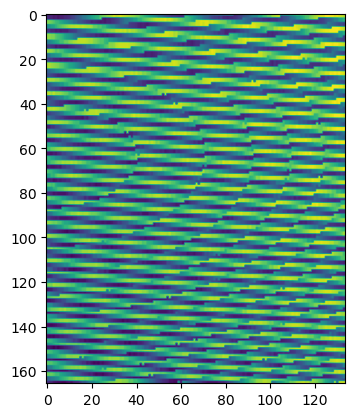

In [46]:
plt.imshow(imfs[0])